### Extracting the data from the MATLAB File 

In [1]:
import numpy as np
from scipy.io import loadmat

data = loadmat('Week2_DataSet.mat')

print("Available variables:", data.keys())


X = data['X']      
y = data['Y'].flatten()
X=X.T
print("X shape:", X.shape)
print("y shape:", y.shape)
print(data)


Available variables: dict_keys(['__header__', '__version__', '__globals__', 'X', 'Y'])
X shape: (100, 4)
y shape: (100,)
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Dec 26 09:37:00 2025', '__version__': '1.0', '__globals__': [], 'X': array([[-9.75908025, -5.20710227, -2.71072329,  6.93161133,  7.14720402,
        -0.72005484,  0.92394035, -4.46896381,  8.90259961,  3.21234634,
        -5.71099207,  8.9160108 , -4.84945867, -6.28574032,  1.91481549,
         6.14729401, -7.68497532,  8.95646221, -0.16399797, -7.02990803,
        -6.78204012,  9.00274906,  2.65080657, -0.47175608,  2.92964731,
        -5.2559225 ,  9.95789038,  1.21033788, -1.51637514, -0.52792122,
        -0.36943392,  3.55260342, -2.90214795,  9.44092267,  3.84871484,
         2.72744744, -6.12000253, -3.93293704, -6.01294439, -5.37713654,
        -0.53673982, -5.52286398,  3.41169526, -1.60855934, -0.20116065,
        -5.36320242, -2.62455651, -4.05264362,  1.83314368,  7.25833749,
       

In [2]:
print(y.shape)

(100,)


Defining the feature map $\phi$(x)<br> 
                                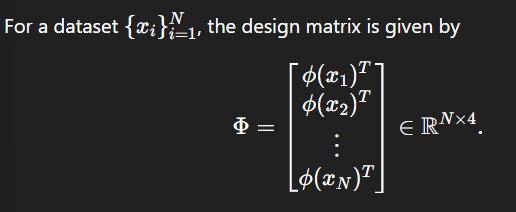


In [3]:
def phi(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return np.array([
        1,
        x1, x2, x3, x4,
        x1**2, x2**2, x3**2, x4**2,
        x1*x2, x1*x3, x1*x4,
        x2*x3, x2*x4,
        x3*x4
    ])

print(phi(X[0]))

[  1.          -9.75908025   9.65751723  -9.79531383   7.44822813
  95.23964724  93.26763901  95.94817309  55.47610227 -94.2484856
  95.59325373 -72.687856   -94.5984121   71.93139148 -72.95773203]


In [4]:
dimension_of_feature_map = phi(X[0]).shape[0]
print(dimension_of_feature_map)

15


In [5]:
# defing the phi as vector function to map all X data points 
def phi_vectorized(X):
    n_samples=X.shape[0]
    phi_matrix = np.zeros((n_samples, dimension_of_feature_map))
    for i in range(n_samples):
        phi_matrix[i] = phi(X[i])
    return phi_matrix

print(phi_vectorized(X))

[[  1.          -9.75908025   9.65751723 ... -94.5984121   71.93139148
  -72.95773203]
 [  1.          -5.20710227  -2.6048318  ...  -5.46899069  -4.15648231
    3.35022327]
 [  1.          -2.71072329   8.56562506 ... -56.65501876  73.69406733
  -56.90531   ]
 ...
 [  1.           8.29912545  -1.9241274  ...   0.19300726 -18.29666057
   -0.95384504]
 [  1.           5.90683152  -0.79235204 ...   4.0497734    7.2531625
   46.786631  ]
 [  1.           0.26945427   6.03078767 ... -43.98490176  14.562556
  -17.61137066]]


In the cell below we are solving the matrix equations for optimal w aka w_star

In [6]:
print(phi_vectorized(X).shape)
Phi = phi_vectorized(X)
w=np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y


(100, 15)


Below here we define our loss function and this one is squared error 

In [7]:
def loss_function(w,alp,y):
    N=len(y)
    total = 0.0
    for i in range(len(y)):
        predicted = alp[i] @ w
        total += (y[i]-predicted)**2

        
    return total/N

print(loss_function(w,Phi,y))

1.2489938786878206e-24


Defining gradient which acts upon the loss function and taking into consideration the normalisation factor too 

In [8]:
def grad(w,alp,y):
    N=alp.shape[0]
    return -(2/N) * alp.T @ (y - alp @ w)

print(grad(w,Phi,y))

[ 2.61763944e-13  2.53376311e-12  7.98573879e-12  8.06202600e-12
  2.01329766e-13  1.02090799e-11  1.66411497e-12 -7.51597702e-12
 -5.71665795e-13 -6.23252270e-13  1.18174621e-11 -9.23205860e-13
 -4.85713310e-12  1.43638868e-12 -1.59100013e-11]


In [9]:
#solving for optimal weights using normal equation
Phi = phi_vectorized(X)
w=np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
print(w)
print(w.shape)


[ 6.53699317e-13  3.19744231e-14  5.00000000e+00  1.49658064e-13
 -1.77635684e-14 -2.00000000e+00 -1.55431223e-15 -1.19904087e-14
 -1.88737914e-15 -8.88178420e-16  7.00000000e+00 -6.66133815e-16
 -2.22044605e-15  1.66533454e-15  1.60000000e+01]
(15,)


In [10]:
#loss function value at optimal weights
print(loss_function(w,Phi,y))

1.2489938786878206e-24


In this part we used an inbuilt quadratic optimization problem solver from __CVXPY__ library 

In [11]:
# formulation of the problem into QP to solve for optimal weights with cvxpy
# another way to express the loss function
# J = w.T @(Phi.T @ Phi) @ w - 2 * y.T @ Phi @ w + y.T @ y

import cvxpy as cp
Q=2*Phi.T @ Phi
c=-(2*Phi.T @ y)

x = cp.Variable(c.shape)

objective = cp.Minimize((1/2)*cp.quad_form(x, Q) + c.T @ x)
constraints = []
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.OSQP)
w_star = x.value
print("Optimal value", x.value)

Polishing not needed - no active set detected at optimal point
Optimal value [-3.30930996e-08 -4.56391735e-09  5.00001421e+00 -1.39704257e-09
 -6.14761630e-09 -2.00000568e+00 -4.98053669e-10  3.81732177e-10
  4.80843282e-10  1.45936061e-11  7.00001990e+00  6.36209131e-10
  5.72096227e-10  6.01784558e-10  1.60000455e+01]


The optimal values we got from the QP solver and the one we obtained from matrix equation solving are quite close .

And the value of the loss function at the optimal value is almost zero which is true as our goal in the optimization problem was to minimize the loss function. 

In [12]:
print(loss_function(w_star,Phi,y))

1.9625875728122685e-06


This is used to print the actual featuremap polynomial along with its weights which the model has learned in the whole process.

### Learned Polynomial

In [13]:
terms = [
    "1",
    "x1", "x2", "x3", "x4",
    "x1^2", "x2^2", "x3^2", "x4^2",
    "x1*x2", "x1*x3", "x1*x4",
    "x2*x3", "x2*x4",
    "x3*x4"
]

print("Learned polynomial:\n")

for i in range(len(w_star)):
    print(w_star[i], "*", terms[i])


Learned polynomial:

-3.3093099609646325e-08 * 1
-4.563917352434791e-09 * x1
5.000014214094079 * x2
-1.3970425720210726e-09 * x3
-6.14761629834209e-09 * x4
-2.0000056849188876 * x1^2
-4.98053669208646e-10 * x2^2
3.81732176586825e-10 * x3^2
4.808432821817531e-10 * x4^2
1.459360608678613e-11 * x1*x2
7.000019898319361 * x1*x3
6.362091310251567e-10 * x1*x4
5.720962270582051e-10 * x2*x3
6.017845577006375e-10 * x2*x4
16.000045484051657 * x3*x4


### Computing the error in our predictions and the actual values from the data

In [14]:
# computing the error vector
error = y - Phi @ w_star
print("Error vector shape :  ",error.shape)

print(error)

Error vector shape :   (100,)
[ 1.82048723e-03  2.56357701e-04  2.15159232e-03 -7.01546090e-04
  8.93457548e-04  6.15500641e-04 -5.23904665e-05 -1.44018703e-04
  3.73536284e-03 -3.57358323e-03  3.39077243e-04  5.64924285e-04
  5.29402359e-04  7.03047357e-04  2.36513914e-03 -1.52112654e-03
 -1.85135971e-03  4.27520152e-04  1.50581690e-03  2.63556485e-04
  7.70597698e-04  6.20798909e-04 -8.71351058e-04  4.99940140e-04
  1.10704580e-03 -7.71213886e-04  1.30268035e-03 -3.23456164e-03
  1.37077789e-04  3.12585443e-03 -1.40177277e-03 -8.64284384e-04
 -3.30161397e-04  4.56168238e-04 -5.30986270e-04 -1.31413288e-03
 -3.00421805e-03  1.51591536e-03  8.72277601e-04 -1.69246089e-03
  1.68460182e-04  3.67662866e-04  5.82600458e-04  1.32440566e-03
 -1.45448090e-03  1.83714959e-03 -3.28940707e-04  2.73443271e-04
  5.66029015e-04  3.47281449e-04 -7.41901740e-04  7.87409863e-04
 -9.90260838e-04  1.03146436e-03  2.47796144e-04 -5.04542002e-04
  2.46618359e-03 -2.04101334e-03  8.66561876e-04  5.37245613

Histogram of the error vector 

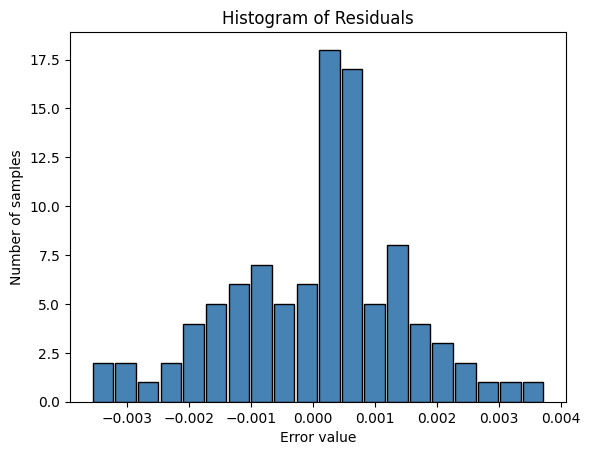

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(
    error,
    bins=20,
    rwidth=0.9,
    color='steelblue',
    edgecolor='black'
)


plt.xlabel("Error value")
plt.ylabel("Number of samples")
plt.title("Histogram of Residuals")
plt.show()


Calculating the hessian so as to get $\beta$ ans $\kappa$ 

In [16]:
#computing kappa
H = (2/Phi.shape[0]) * (Phi.T @ Phi)
eigvals = np.linalg.eigvalsh(H)

beta=np.max(eigvals)
mu=np.min(eigvals)

kappa = beta/mu
print(kappa)

33566.81150252903


Algorithm for Gradient Descent method 

In [17]:
eta = 0.5/beta
T=1000
def gradient_descent(w,T,eta):
    loss_gd =[]
    error_gd=[]
    w_gd=w.copy()
    for _ in range(T):
        w_gd = w_gd - eta * grad(w_gd,Phi,y)
        loss_gd.append(loss_function(w_gd,Phi,y))
        error_gd.append(np.linalg.norm(w_gd-w_star))
    return w_gd,loss_gd,error_gd




w0 = np.zeros(Phi.shape[1])
p_gd,loss_gd,error_gd = gradient_descent(w0,T,eta)
print("Initial loss:",loss_gd[0])
print("Final loss:",loss_gd[-1])

Initial loss: 201187.77749234653
Final loss: 4.383301759975364


The results clearly show that the Gradient descent method converges as we have reduced the loss function to a very less value .

We define our parameter $\alpha$ for the accelerated gradient descent method 

In [18]:
#agd parameters
alpha = (np.sqrt(kappa)-1)/(np.sqrt(kappa)+1)
print(beta)
print(alpha)

10342.217948777703
0.9891429720762361


Algorithm for Accelerated Gradient Descent method 

In [19]:
def acc_grad_des(w0, T):
    x = w0.copy()        
    z_prev = w0.copy()  

    loss_hist = []
    error_hist = []

    for _ in range(T):
        
        z_new = x - (1 / beta) * grad(x, Phi, y)

        
        x_new = (1 + alpha) * z_new - alpha * z_prev

        
        z_prev = z_new
        x = x_new

        loss_hist.append(loss_function(x, Phi, y))
        error_hist.append(np.linalg.norm(x - w_star))

    return x, loss_hist, error_hist


p_agd,loss_agd,error_agd = acc_grad_des(w0,T)
print(p_agd)
print(loss_agd)
print(error_agd)


[-8.70212244e-04  5.82707497e-04  4.99899745e+00  6.70498881e-04
 -2.45283609e-04 -2.00000795e+00  3.89187902e-05  4.09618242e-06
  2.43486683e-05 -5.46682864e-05  7.00005084e+00 -9.17404900e-06
 -8.83459508e-05  2.38460353e-05  1.59999902e+01]
[np.float64(106733.5465983763), np.float64(33603.894043342545), np.float64(19621.568458900507), np.float64(32041.08309928005), np.float64(47404.86334603522), np.float64(56499.96012555808), np.float64(57501.663495072455), np.float64(51272.036859379376), np.float64(40145.457878520276), np.float64(27330.30065772347), np.float64(15993.532515905083), np.float64(8442.297328352981), np.float64(5588.448471662496), np.float64(6727.426212475493), np.float64(9857.282518932725), np.float64(12608.017257701807), np.float64(13338.504810431921), np.float64(11740.212337902492), np.float64(8653.732591412518), np.float64(5367.104091676289), np.float64(2914.817348301931), np.float64(1728.99740256144), np.float64(1671.6242796374634), np.float64(2274.77523872781), np

In [20]:
print("Initial Loss : ",loss_agd[0])
print("Final Loss:",loss_agd[-1])

Initial Loss :  106733.5465983763
Final Loss: 3.884293671989485e-05


The extent of convergence for accelerated gradient descent is more than that of gradient descent 

Algorithm for Stochastic Gradient Descent 

In [21]:
def stochastic_gradient_descent(w0, T):
    w = w0.copy()
    N = Phi.shape[0]

    loss_hist = []
    error_hist = []

    for t in range(T):
        # pick one random sample
        i = np.random.randint(N)
        phi_i = Phi[i]
        y_i = y[i]

        # stochastic gradient
        grad_i = -phi_i * (y_i - phi_i @ w)

        # update step
        w = w - eta * grad_i

        # store metrics
        loss_hist.append(loss_function(w, Phi, y))
        error_hist.append(np.linalg.norm(w - w_star))

    return w, loss_hist, error_hist

p_sgd,loss_sgd,error_sgd = stochastic_gradient_descent(w0,T)
print(p_sgd)
print(loss_sgd)
print(error_sgd)


[ 5.87801128e-02  1.87135951e-01  3.97930639e+00  2.10097985e-01
 -3.59083325e-02 -2.01415760e+00 -2.93256958e-02  1.34270834e-02
 -2.46262426e-02 -9.29803841e-02  7.01040814e+00  3.66129296e-02
 -8.31487980e-02  4.32024137e-02  1.59962291e+01]
[np.float64(261204.05886386297), np.float64(242286.8052278786), np.float64(261494.9093224164), np.float64(255814.3926999935), np.float64(239108.07321939775), np.float64(198473.28863371207), np.float64(287044.6750524212), np.float64(287183.1671365975), np.float64(286462.94379948644), np.float64(276507.7833282764), np.float64(279902.8827064663), np.float64(288965.3415494248), np.float64(223099.7342609918), np.float64(444298.98647501663), np.float64(100317.48206648904), np.float64(95255.505355141), np.float64(112348.09943281388), np.float64(115307.65652590567), np.float64(74040.26050850323), np.float64(64660.50764373506), np.float64(62044.79929652268), np.float64(57093.454617666226), np.float64(56312.25798515358), np.float64(46034.94598732354), np.

In [22]:
print("Initial loss : ",loss_sgd[0])
print("Final loss : ",loss_sgd[-1])

Initial loss :  261204.05886386297
Final loss :  48.397608956305795


The extent of convergence is the poorest for Stochastic Gradient Descent method .

Plooting the curve between Log(cost_function) v/s number of iterations

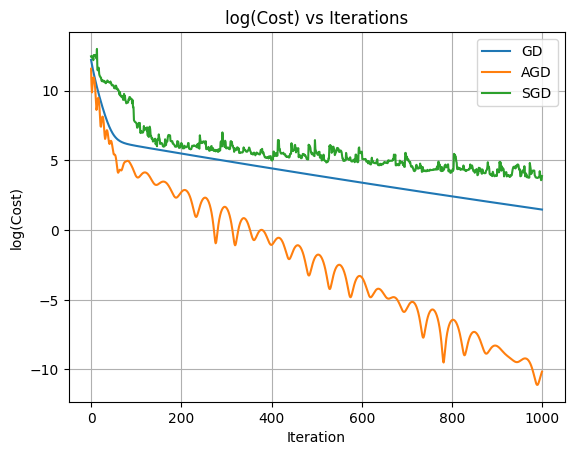

In [23]:


plt.figure()

plt.plot(np.log(loss_gd), label='GD')
plt.plot((np.log(loss_agd)), label='AGD')
plt.plot(np.log(loss_sgd), label='SGD')

plt.xlabel("Iteration")
plt.ylabel("log(Cost)")
plt.title("log(Cost) vs Iterations")
plt.legend()
plt.grid(True)

plt.show()


The above plot clearly indicates that though GD is less noisy and good in convergence but the maximum rate is for ACD but is shows lot of noise 

SGD never converges to such extent in this case 

Plotting the curve between Log(Error) v/s no of iterations 

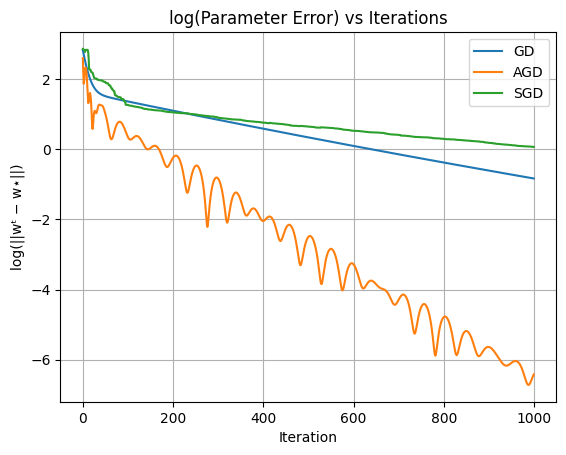

In [24]:
plt.figure()

plt.plot(np.log(error_gd), label='GD')
plt.plot(np.log(error_agd), label='AGD')
plt.plot(np.log(error_sgd), label='SGD')

plt.xlabel("Iteration")
plt.ylabel("log(||wᵗ − w⋆||)")
plt.title("log(Parameter Error) vs Iterations")
plt.legend()
plt.grid(True)

plt.show()


Beow is a plot between Log(Cost) v/s number of gradients

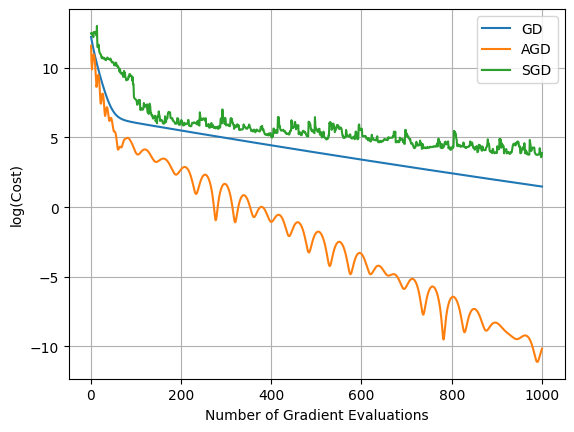

In [25]:
# grad_evals = np.arange(1,T+1)
grad_eval_gd = list(range(1, len(loss_gd)+1))
grad_eval_agd = list(range(1, len(loss_agd)+1))
grad_eval_sgd = list(range(1, len(loss_sgd)+1))
plt.figure()
plt.plot(grad_eval_gd,np.log(loss_gd),label="GD")
plt.plot(grad_eval_agd,np.log(loss_agd),label="AGD")
plt.plot(grad_eval_sgd,np.log(loss_sgd),label="SGD")
plt.xlabel("Number of Gradient Evaluations")
plt.ylabel("log(Cost)")
plt.legend()
plt.grid(True)
plt.show()

Below is a plot between Log(Error) v/s number of gradients

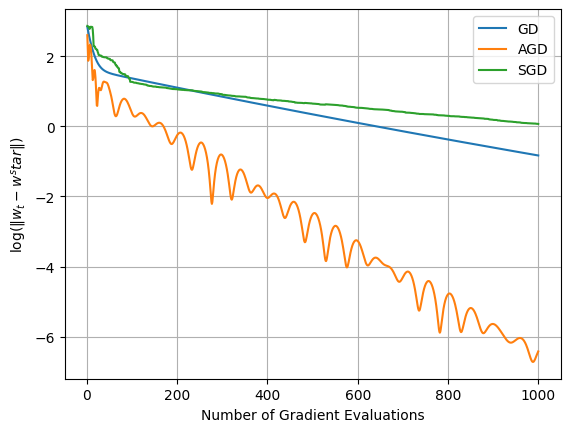

In [26]:
plt.figure()
plt.plot(grad_eval_gd,np.log(error_gd),label="GD")
plt.plot(grad_eval_agd,np.log(error_agd),label="AGD")
plt.plot(grad_eval_sgd,np.log(error_sgd),label="SGD")
plt.xlabel("Number of Gradient Evaluations")
plt.ylabel(r"log($\|w_t - w^star\|$)")
plt.legend()
plt.grid(True)
plt.show()

### Repeating 
### While taking into consideration only 10 data Points 

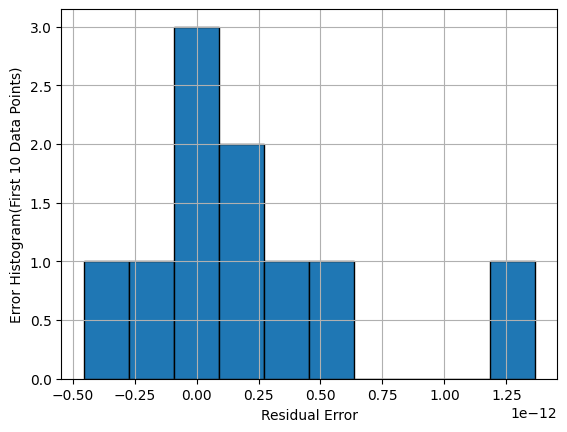

In [27]:
Phi_10 = Phi[:10]
y_10 = y[:10]
w_star_10 = np.linalg.pinv(Phi_10) @ y_10
residuals = Phi_10 @ w_star_10 - y_10

plt.figure()
plt.hist(residuals,bins=10,edgecolor='black')
plt.xlabel("Residual Error")
plt.ylabel("Error Histogram(First 10 Data Points)")
plt.grid(True)
plt.show()

Checking if the w_optimal obtained is a unique one or not 

In [28]:
rank = np.linalg.matrix_rank(Phi_10)
num_features = Phi_10.shape[1]

print(rank)
print(num_features)

10
15


In [29]:
if(rank<num_features):
    print('NOt Unique')
else:
    print('Unique')

NOt Unique


In [30]:
eigvals = np.linalg.eigvalsh(Phi_10.T @ Phi_10)
print("Minimum eigenvalue :  ",np.min(eigvals))


Minimum eigenvalue :   -9.42822599033496e-12


In [31]:
# Phi_mean = Phi.mean(axis=0)
# Phi_std = Phi.std(axis=0) + 1e-8

# Phi_scaled = (Phi-Phi_mean)/Phi_std
# y_scaled = y- y.mean()

L1 regression with regularization
The features I am using are not normalized ones.

In [32]:
N,d = Phi.shape
lambda_vals = [0.01,0.1,1,10,100,500,1000,1500,2000,2500,3000,3500,4000]
nonzeros_list = []
l1_norm_list = []

threshold = 1e-2 

for lam in lambda_vals:
    w = cp.Variable(d)

    objective = cp.Minimize(
        (1/N) * cp.sum_squares(Phi @ w - y)
        + lam * cp.norm1(w)
    )

    problem = cp.Problem(objective)
    problem.solve(solver=cp.ECOS)

    w_opt = w.value

    # Count non-zero coefficients
    if np.linalg.norm(w_opt, 1) < 1e-6:
        nonzeros = 0
    else:
        nonzeros = np.sum(np.abs(w_opt) > threshold)

    nonzeros_list.append(nonzeros)

    # L1 norm
    l1_norm = np.linalg.norm(w_opt, 1)
    l1_norm_list.append(l1_norm)

    print(f"lambda = {lam}")
    print("||w||_1 =", l1_norm)
    print("Non-zero entries:", nonzeros)
    print("-" * 40)


lambda = 0.01
||w||_1 = 29.99982042761264
Non-zero entries: 4
----------------------------------------
lambda = 0.1
||w||_1 = 29.99820433416715
Non-zero entries: 4
----------------------------------------
lambda = 1
||w||_1 = 29.982045055499803
Non-zero entries: 4
----------------------------------------
lambda = 10
||w||_1 = 29.820409936292577
Non-zero entries: 4
----------------------------------------
lambda = 100
||w||_1 = 28.20377196451078
Non-zero entries: 5
----------------------------------------
lambda = 500
||w||_1 = 24.067303552295293
Non-zero entries: 3
----------------------------------------
lambda = 1000
||w||_1 = 23.14196593911622
Non-zero entries: 3
----------------------------------------
lambda = 1500
||w||_1 = 22.218097943156558
Non-zero entries: 3
----------------------------------------
lambda = 2000
||w||_1 = 21.294883640502718
Non-zero entries: 3
----------------------------------------
lambda = 2500
||w||_1 = 20.37159196012771
Non-zero entries: 3
--------------

c:\Users\Rohit Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


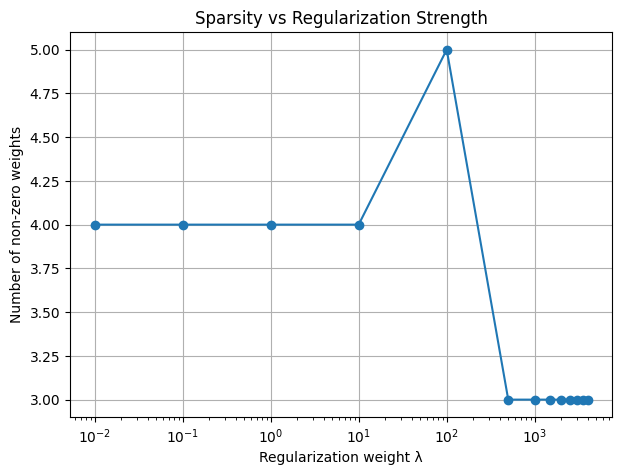

In [33]:
plt.figure(figsize=(7,5))
plt.plot(lambda_vals, nonzeros_list, marker="o")
plt.xscale("log")
plt.xlabel("Regularization weight λ")
plt.ylabel("Number of non-zero weights")
plt.title("Sparsity vs Regularization Strength")
plt.grid(True)
plt.show()


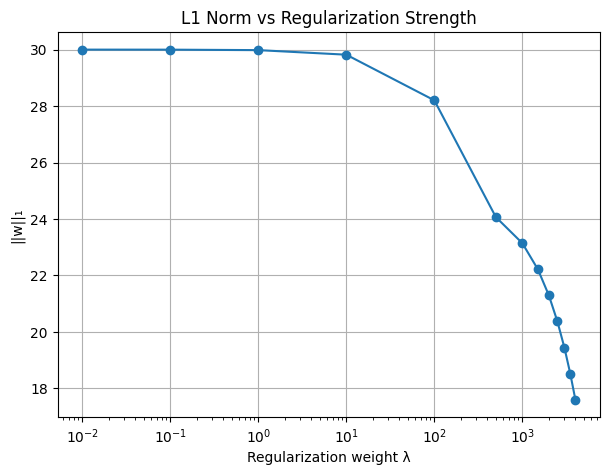

In [34]:
plt.figure(figsize=(7,5))
plt.plot(lambda_vals, l1_norm_list, marker='o')
plt.xscale('log')
plt.xlabel("Regularization weight λ")
plt.ylabel("||w||₁")
plt.title("L1 Norm vs Regularization Strength")
plt.grid(True)
plt.show()


The unregularized solution 
𝑤
⋆
w
⋆
 is obtained by minimizing the empirical least-squares loss and typically has non-zero values across many components. In contrast, the regularized solution 
𝑤
reg
⋆
w
reg
⋆
	​

, obtained by adding an ℓ₁ penalty, trades off data fidelity for model simplicity.

As the regularization parameter increases, the ℓ₁ norm of 
𝑤
reg
⋆
w
reg
⋆
	​

 decreases and many coefficients are driven exactly (or numerically) to zero, resulting in a sparse solution. This sparsity is not present in 
𝑤
⋆
w
⋆
, which generally has a larger ℓ₁ norm and includes all features.

Therefore, while 
𝑤
⋆
w
⋆
 focuses solely on minimizing training error, 
𝑤
reg
⋆
w
reg
⋆
	​

 enforces sparsity and performs implicit feature selection, potentially improving interpretability and robustness at the cost of a slightly higher training error.